In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

In [520]:
#-(WE WILL FIRST ORGANIZE THE DATA) 
# ÖNCELİKLE DATA DÜZENLEME İŞLEMİ YAPCAĞIZ

In [446]:
data = pd.read_csv("SuperstoreData.csv")

In [448]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [450]:
data.shape

(9800, 18)

In [452]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [454]:
df = data.drop(["Row ID","Order ID","Product ID","Customer ID"],axis=1)

In [456]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [458]:
# kaç tane null değer var onun toplamıına bakıyoruz
# how many null values are there, we look at the sum of them
data.isnull().sum() 

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [460]:
# şimdi burda 11 tane Postal Code değeri null olarak gözüküyor bunu düzeltmeliyiz
# Now here 11 Postal Code values appear as null, we need to fix this
df[df["Postal Code"].isnull()] 

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [462]:
# posta kodunun 5402 olduğunu gördük ve null değerlerini düzelttik
# we saw that the zip code was 5402 and corrected the null values
df["Postal Code"]=df["Postal Code"].fillna(5402) 
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [464]:
# bakıyoruzki eksik verimiz kalmadı
# we see that we have no more missing data
df.isnull().sum() 

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [466]:
# Ay Sütunu Yapacağız
# We'll make a month column
df["Month"] = df["Order Date"].str[3:5]
df["Month"] = df["Month"].astype("int32")

# Ayları İsime Dönüştür
# Convert Months to Names
d = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 
     7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

df["Month"] = [d[i] for i in df["Month"]]

# Yıl sütununu datetime ile yapıyoruz
# We make the year column with datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")
df["Year"] = df["Order Date"].dt.year
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,May,2017
9796,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,January,2016
9797,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,January,2016
9798,2016-01-12,2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,January,2016


In [468]:
category = df.groupby("Category")["Sales"].sum()
category = category.reset_index()
category = category.sort_values(by='Sales', ascending=False) 
category

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


In [518]:
# DATA VISUALIZATION
# VERİ GÖRÜNTÜLEME

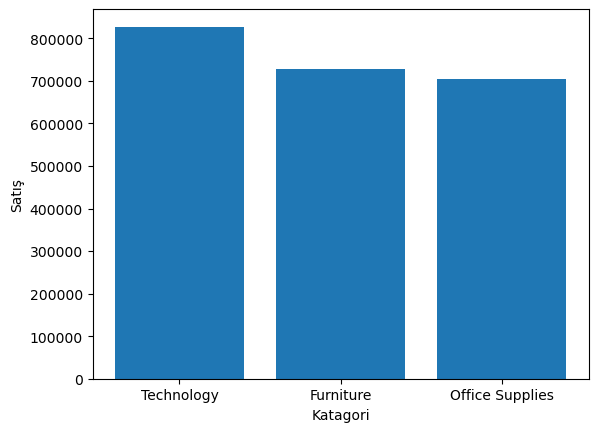

In [470]:
plt.bar(category["Category"],category["Sales"])
plt.xlabel("Katagori")
plt.ylabel("Satış")
plt.show()

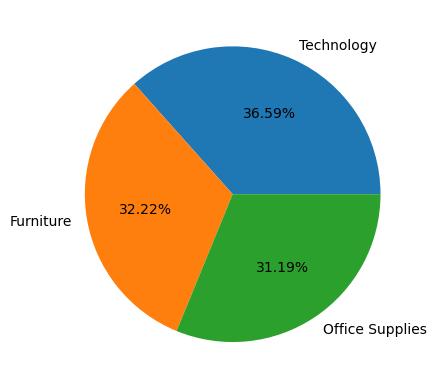

In [472]:
plt.pie(category["Sales"],labels=category["Category"],autopct="%0.2f%%")
plt.show()

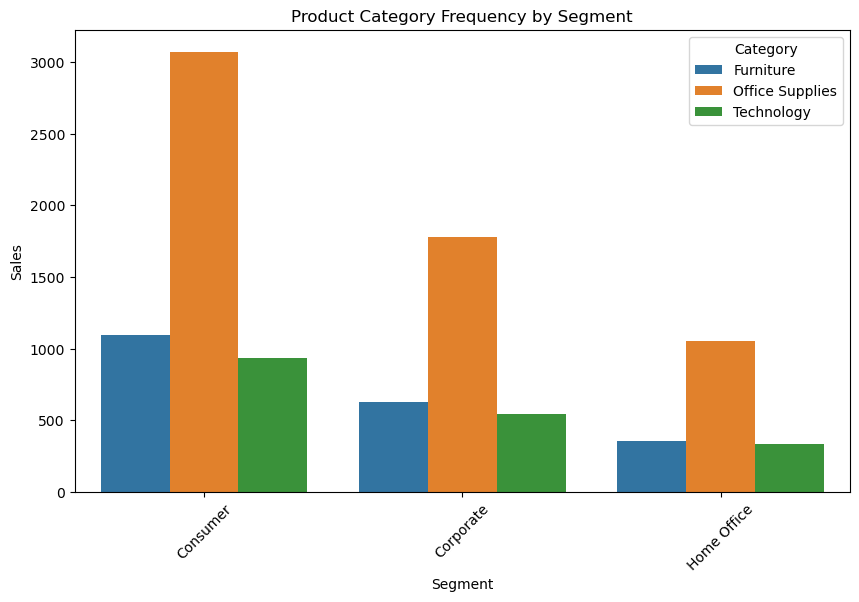

In [474]:
# Segmentlere göre kategori sıklığı grafiği
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Segment', hue='Category')
plt.title('Product Category Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [476]:
years_df = df.groupby("Year")["Sales"].sum()
years_df = years_df.reset_index()
years_df

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


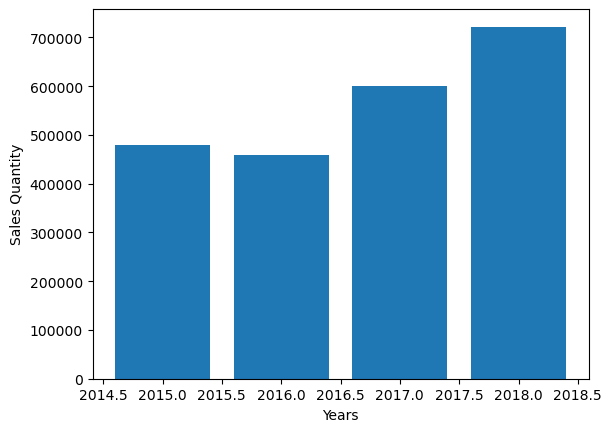

In [478]:
plt.bar(years_df["Year"],years_df["Sales"])
plt.xlabel("Years")
plt.ylabel("Sales Quantity")
plt.show()

In [480]:
Customer = df.groupby("Customer Name")["Sales"].sum()
#Dataframe ye çevirdik
Customer_Sales = Customer.reset_index()
Customer_Sales = Customer_Sales.sort_values(by='Sales', ascending=False) #Sıralama
Customer_Sales = Customer_Sales.head(20)
Customer_Sales

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


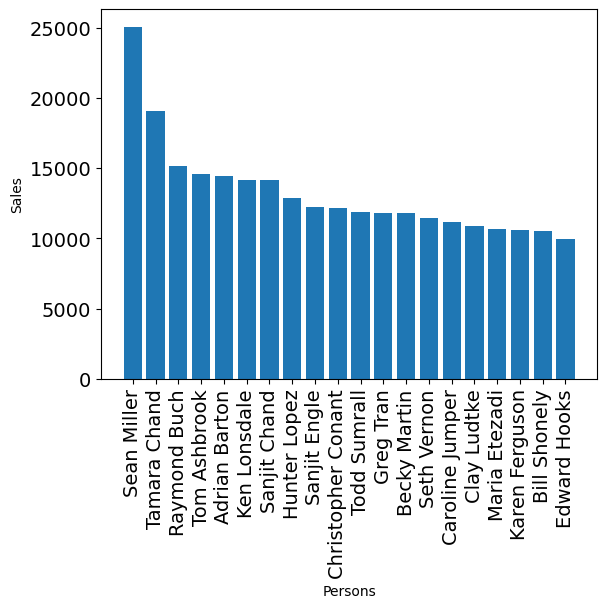

In [482]:
plt.bar(Customer_Sales["Customer Name"],Customer_Sales["Sales"])
plt.xlabel("Persons")
plt.ylabel("Sales")
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show()

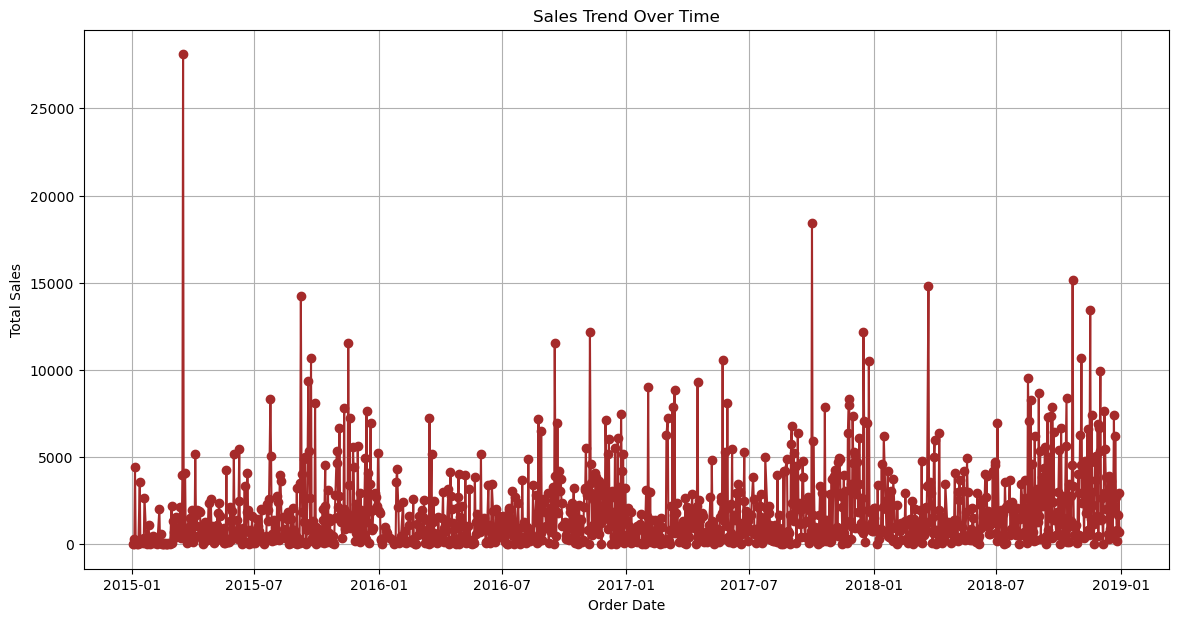

In [484]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_trend = df.groupby('Order Date')['Sales'].sum().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(sales_trend['Order Date'], sales_trend['Sales'], marker='o', linestyle='-',color='Brown')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

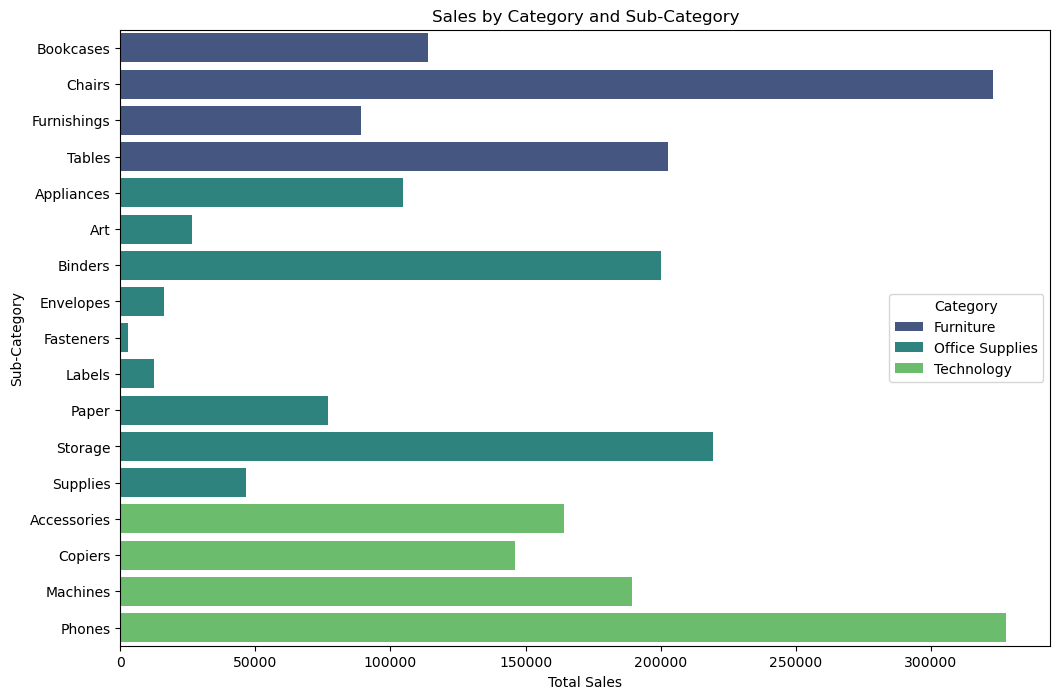

In [486]:
# Category ve Sub-Category'ye göre toplam satışları hesapla
# Calculate total sales by Category and Sub-Category
sales_by_category = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Barplot çizimi
# Barplot illustration
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=sales_by_category, palette='viridis')

plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

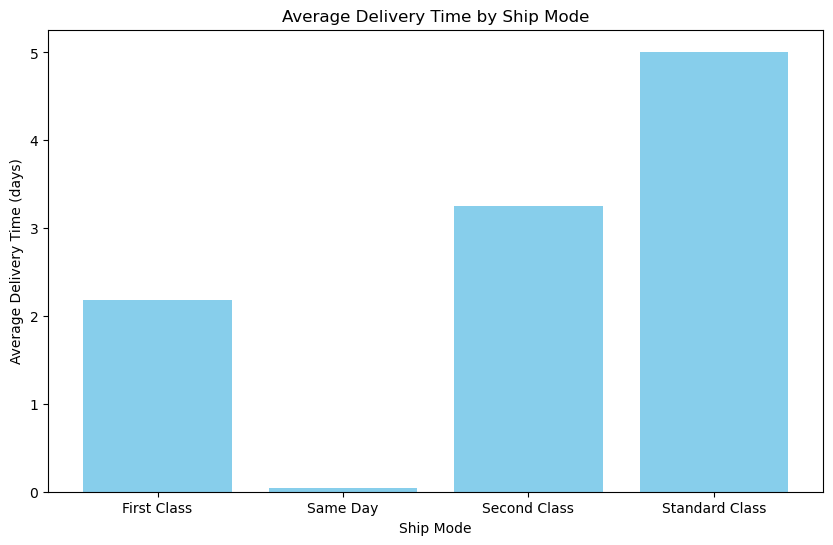

In [488]:

# "Ship Date" ve "Order Date" arasındaki farkı hesaplayarak "Delivery Time" sütununu oluşturma
# Create the “Delivery Time” column by calculating the difference between “Ship Date” and “Order Date”
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# "Ship Mode" bazında ortalama teslim süresini hesaplama
# Calculate average lead time based on “Ship Mode”
average_delivery_time = df.groupby('Ship Mode')['Delivery Time'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(average_delivery_time['Ship Mode'], average_delivery_time['Delivery Time'], color='skyblue')
plt.title('Average Delivery Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Delivery Time (days)')
plt.show()

<Figure size 1400x800 with 0 Axes>

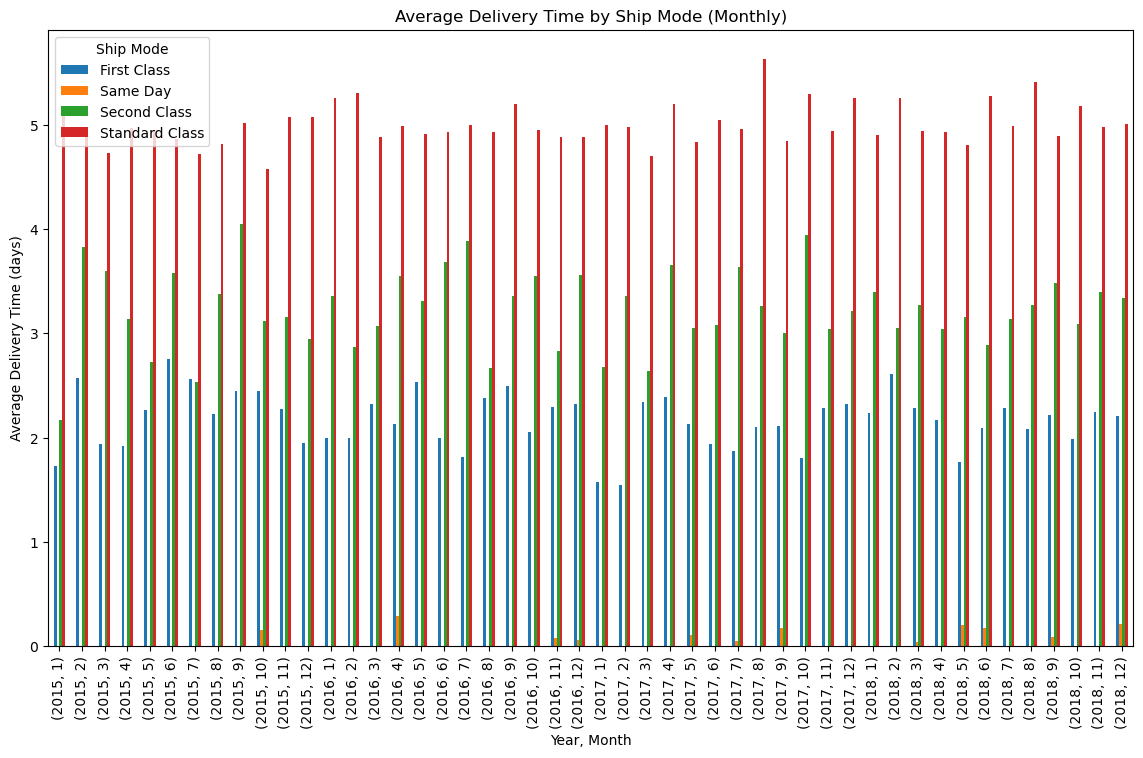

In [489]:
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

average_delivery_time = df.groupby(['Ship Mode', 'Year', 'Month'])['Delivery Time'].mean().reset_index()

pivot_table = average_delivery_time.pivot_table(values='Delivery Time', index=['Year', 'Month'], columns='Ship Mode')

plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', figsize=(14, 8))

plt.title('Average Delivery Time by Ship Mode (Monthly)')
plt.xlabel('Year, Month')
plt.ylabel('Average Delivery Time (days)')
plt.legend(title='Ship Mode')
plt.show()

In [491]:
city_df = df.groupby("State")["Sales"].sum()
city_df = city_df.reset_index()
city_df = city_df.sort_values(by='Sales', ascending=False)
city_df

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


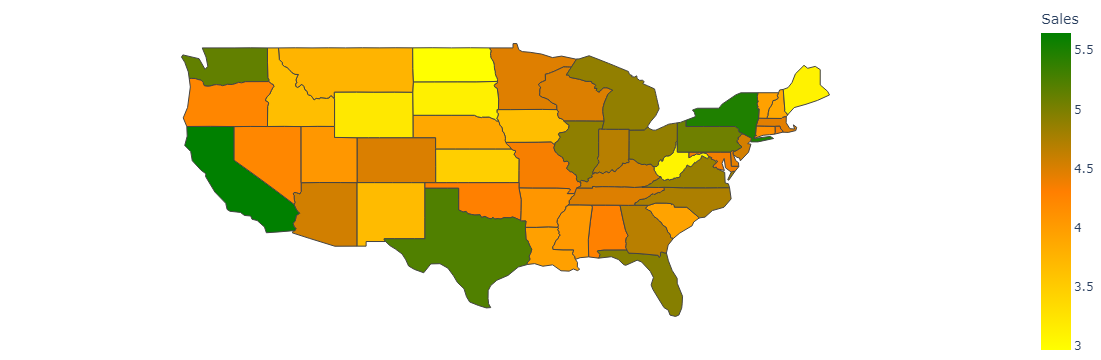

In [494]:
import geopandas as gpd
import numpy as np
import plotly.express as px

# Dosya yolunu belirtiyoruz (Shapefile)
# Specify the file path (Shapefile)
shapefile_path = 'ne_110m_admin_1_states_provinces.shp'

# Shapefile'ı Geopandas ile okuyarak 'states' adlı bir GeoDataFrame oluşturuyoruz
# Reading the Shapefile with Geopandas and creating a GeoDataFrame called 'states'
states = gpd.read_file(shapefile_path)

# Koordinat referans sistemini WGS 84 (epsg:4326) olarak değiştiriyoruz
# Changing the coordinate reference system to WGS 84 (epsg:4326)
states = states.to_crs(epsg=4326)

# 'name' sütununu normalleştirip küçük harf yaparak yeni bir sütun oluşturuyoruz
# Creating a new column by normalizing and converting the 'name' column to lowercase
states["name_normalized"] = states["name"].str.lower()

# Şehir DataFrame'inde 'State' sütununu küçük harfe çeviriyoruz
# Converting the 'State' column in the city DataFrame to lowercase
city_df["City_normalized"] = city_df["State"].str.lower()

# İki DataFrame'i, normalleştirilmiş adlar üzerinde birleştiriyoruz
# Merging the two DataFrames on the normalized names
merged = states.merge(city_df, left_on="name_normalized", right_on="City_normalized")

# Satış değerlerinin logaritmasını alarak yeni bir sütun oluşturuyoruz
# Creating a new column by taking the logarithm of the sales values
merged['Sales_log'] = np.log10(merged['Sales'] + 1)  # Log(0) hatasını önlemek için +1 ekliyoruz / Adding +1 to avoid log(0) error

# Özel renk skalasını tanımlıyoruz
# Defining the custom color scale
custom_colors = ["Yellow", "#FF7F00", "Green"] 

# Choropleth haritası oluşturuyoruz
# Creating the Choropleth map
fig = px.choropleth(merged,
                    geojson=merged.geometry,  # GeoJSON geometrisini kullanarak haritayı çizdiriyoruz / Drawing the map using GeoJSON geometry
                    locations=merged.index,  # Hangi satırın hangi lokasyona denk geldiğini belirtiyoruz / Specifying which row corresponds to which location
                    color="Sales_log",  # Renk skalası için hangi sütunun kullanılacağını belirtiyoruz / Specifying which column to use for the color scale
                    hover_name="State",  # Harita üzerinde fareyle üzerine gelindiğinde görünecek isim / Name that appears when hovering over the map
                    hover_data={"Sales": True},  # Hover verisinde gösterilecek ek bilgiler / Additional data to display on hover
                    color_continuous_scale=custom_colors,  # Renk skalasını tanımlıyoruz / Defining the color scale
                    labels={"Sales_log": "Sales"})  # Etiketleme / Labeling

# Haritayı mevcut lokasyonlarla sınırlandırıyoruz ve görünürlüğü kapatıyoruz
# Adjusting the map to fit the current locations and making it invisible
fig.update_geos(fitbounds="locations", visible=False)

# Grafik düzenini ve kenar boşluklarını ayarlıyoruz
# Updating the layout and margins of the plot
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Haritayı görüntülüyoruz
# Displaying the map
fig.show()


In [496]:
# Müşteri bazında toplam harcama ve alışveriş sıklığını hesaplayın
# Calculate total spend and shopping frequency per customer
customer_data = df.groupby('Customer Name').agg({
    'Sales': 'sum',
    'Order Date': 'nunique'  # Sipariş sıklığını hesaplamak için unique Order Date kullanıyoruz (We use unique Order Date to calculate order frequency)
}).reset_index()

# Sütun isimlerini daha anlamlı hale getirin
# Make column names more meaningful
customer_data.columns = ['Customer Name', 'Total Sales', 'Order Frequency']

In [498]:
# K-Means algoritmasını uygulayın
# Apply the K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=0)
customer_data['Segment'] = kmeans.fit_predict(customer_data[['Total Sales', 'Order Frequency']])

# Segment isimlerini ekleyin
# Add segment names
segment_names = {1: 'Low Expenditures', 0: 'Medium Expenditures', 2: 'High Expenditures'}
customer_data['Segment Name'] = customer_data['Segment'].map(segment_names)

C:\Users\enest\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [500]:
customer_data

,Customer Name,Total Sales,Order Frequency,Segment,Segment Name
0,Aaron Bergman,886.156,3,1,Low Expenditures
1,Aaron Hawkins,1744.700,7,1,Low Expenditures
2,Aaron Smayling,3050.692,7,1,Low Expenditures
3,Adam Bellavance,7755.620,8,0,Medium Expenditures
4,Adam Hart,3250.337,10,1,Low Expenditures
...,...,...,...,...,...
788,Xylona Preis,2374.658,11,1,Low Expenditures
789,Yana Sorensen,6720.444,8,0,Medium Expenditures
790,Yoseph Carroll,5454.350,5,0,Medium Expenditures
791,Zuschuss Carroll,8025.707,13,0,Medium Expenditures


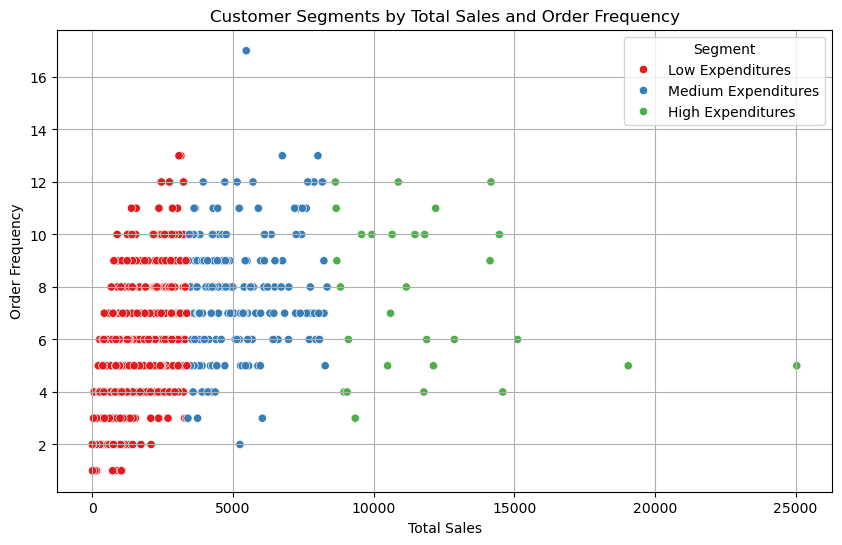

In [502]:
# Scatter plot oluşturuyoruz
# We create a scatter plot
plt.figure(figsize=(10, 6))

# Her bir segment için farklı renklerde bir scatter plot
# A scatter plot with different colors for each segment
sns.scatterplot(x='Total Sales', y='Order Frequency', hue='Segment Name', data=customer_data, palette='Set1')

plt.title('Customer Segments by Total Sales and Order Frequency')
plt.xlabel('Total Sales')
plt.ylabel('Order Frequency')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

In [504]:
# En çok satış getiren müşterileri belirleme
# Identifying the customers who bring in the most sales
top_customers = customer_data.sort_values(by='Total Sales', ascending=False)
top_customers = top_customers.head(10)
top_customers

,Customer Name,Total Sales,Order Frequency,Segment,Segment Name
686,Sean Miller,25043.050,5,2,High Expenditures
730,Tamara Chand,19052.218,5,2,High Expenditures
622,Raymond Buch,15117.339,6,2,High Expenditures
757,Tom Ashbrook,14595.620,4,2,High Expenditures
6,Adrian Barton,14473.571,10,2,High Expenditures
441,Ken Lonsdale,14175.229,12,2,High Expenditures
671,Sanjit Chand,14142.334,9,2,High Expenditures
334,Hunter Lopez,12873.298,6,2,High Expenditures
672,Sanjit Engle,12209.438,11,2,High Expenditures
156,Christopher Conant,12129.072,5,2,High Expenditures


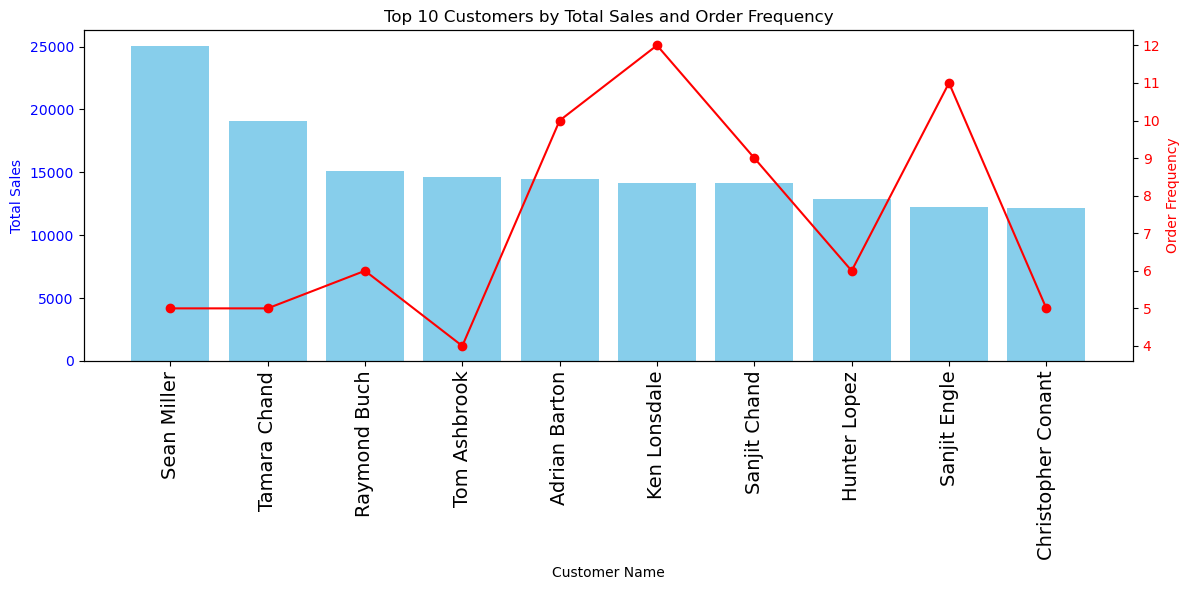

In [511]:
# Çift eksenli grafik oluşturma
# Create a biaxial graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Birinci eksen (Toplam satış miktarı)
# First axis (Total sales volume)
ax1.bar(top_customers['Customer Name'], top_customers['Total Sales'], color='skyblue', label='Total Sales')
ax1.set_xlabel('Customer Name')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# X eksenindeki isimleri dikey yapma
# Make names on the X axis vertical
plt.xticks(fontsize=14,rotation=90)

# İkinci eksen (Sipariş sıklığı)
# Second axis (Order frequency)
ax2 = ax1.twinx()
ax2.plot(top_customers['Customer Name'], top_customers['Order Frequency'], color='red', marker='o', label='Order Frequency')
ax2.set_ylabel('Order Frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Başlık ve gösterge ekleme
# Add title and legend
plt.title('Top 10 Customers by Total Sales and Order Frequency')
fig.tight_layout()
plt.show()

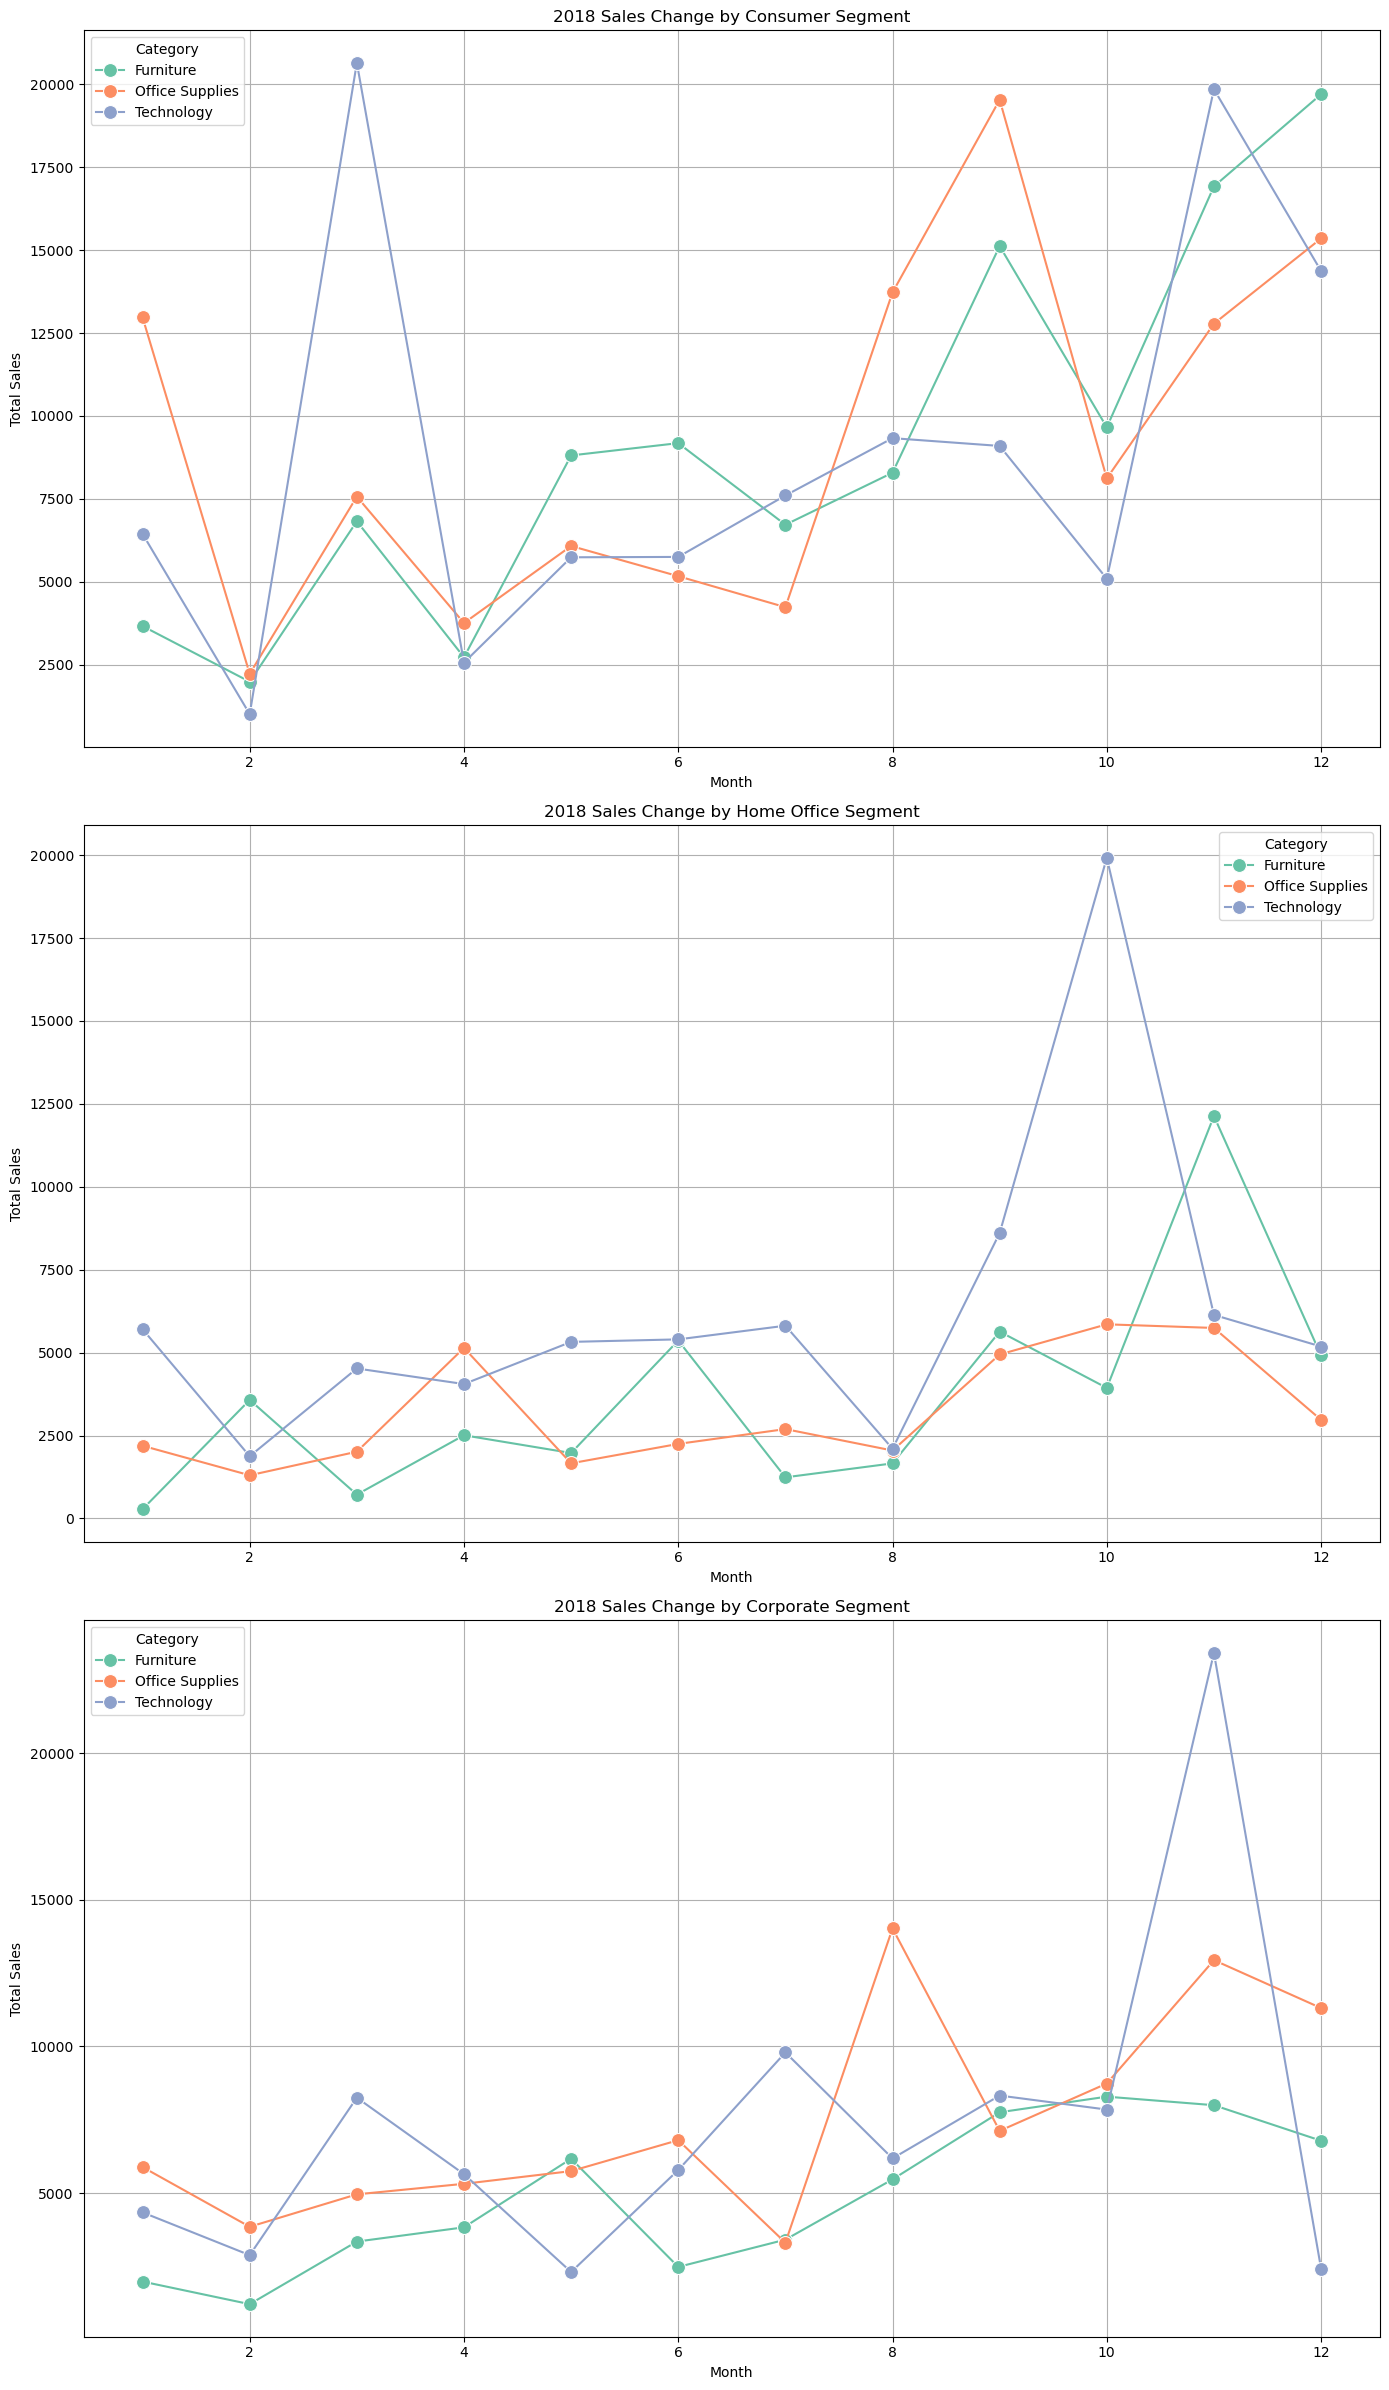

In [522]:
# Tarihleri datetime formatına çevirme ve 2018 yılına filtreleme
# Convert dates to datetime format and filter to 2018
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df_2018 = df.loc[df['Order Date'].dt.year == 2018].copy()  
# .copy() ekleyerek uyarıyı önlüyoruz,
# We avoid the warning by adding .copy()

# Aylık bazda segment ve kategoriye göre satışları gruplama
# Grouping sales by segment and category on a monthly basis
df_2018['Month'] = df_2018['Order Date'].dt.month
monthly_sales = df_2018.groupby(['Month', 'Segment', 'Category'])['Sales'].sum().reset_index()

# Segmentlerin listesi
# List of segments
segments = df_2018['Segment'].unique()

# Her segment için ayrı grafik oluşturma
# Create a separate chart for each segment

plt.figure(figsize=(14, 24)) 

# Yüksekliği artırdık, böylece 3 grafik sığar
# We increased the height so 3 charts fit

for i, segment in enumerate(segments):
    plt.subplot(3, 1, i + 1)
    sns.lineplot(data=monthly_sales[monthly_sales['Segment'] == segment], 
                 x='Month', y='Sales', hue='Category', 
                 markers=True, dashes=False, markersize=10, marker='o', 
                 palette='Set2')
    plt.title(f'2018 Sales Change by {segment} Segment')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.legend(title='Category')

plt.tight_layout()
plt.show()
